# Importing The Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing The Dataset

In [2]:
df= pd.read_csv("Bank Customer Churn Prediction.csv")
df

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
df.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [5]:
#Checking For null values in dataset
df.isna().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

#### As all coumns show zero for null,this means no column has a null value.

# Exploratory Data Analysis

In [6]:
labels= ["Retained","Churned"]
val= df['churn'].value_counts().values
val

array([7963, 2037], dtype=int64)

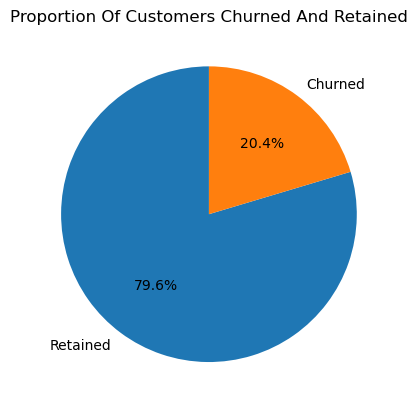

In [7]:
fig1,axs1 = plt.subplots()
axs1.pie(val,labels=labels, autopct ='%1.1f%%',startangle =90)
plt.title('Proportion Of Customers Churned And Retained')
plt.show()

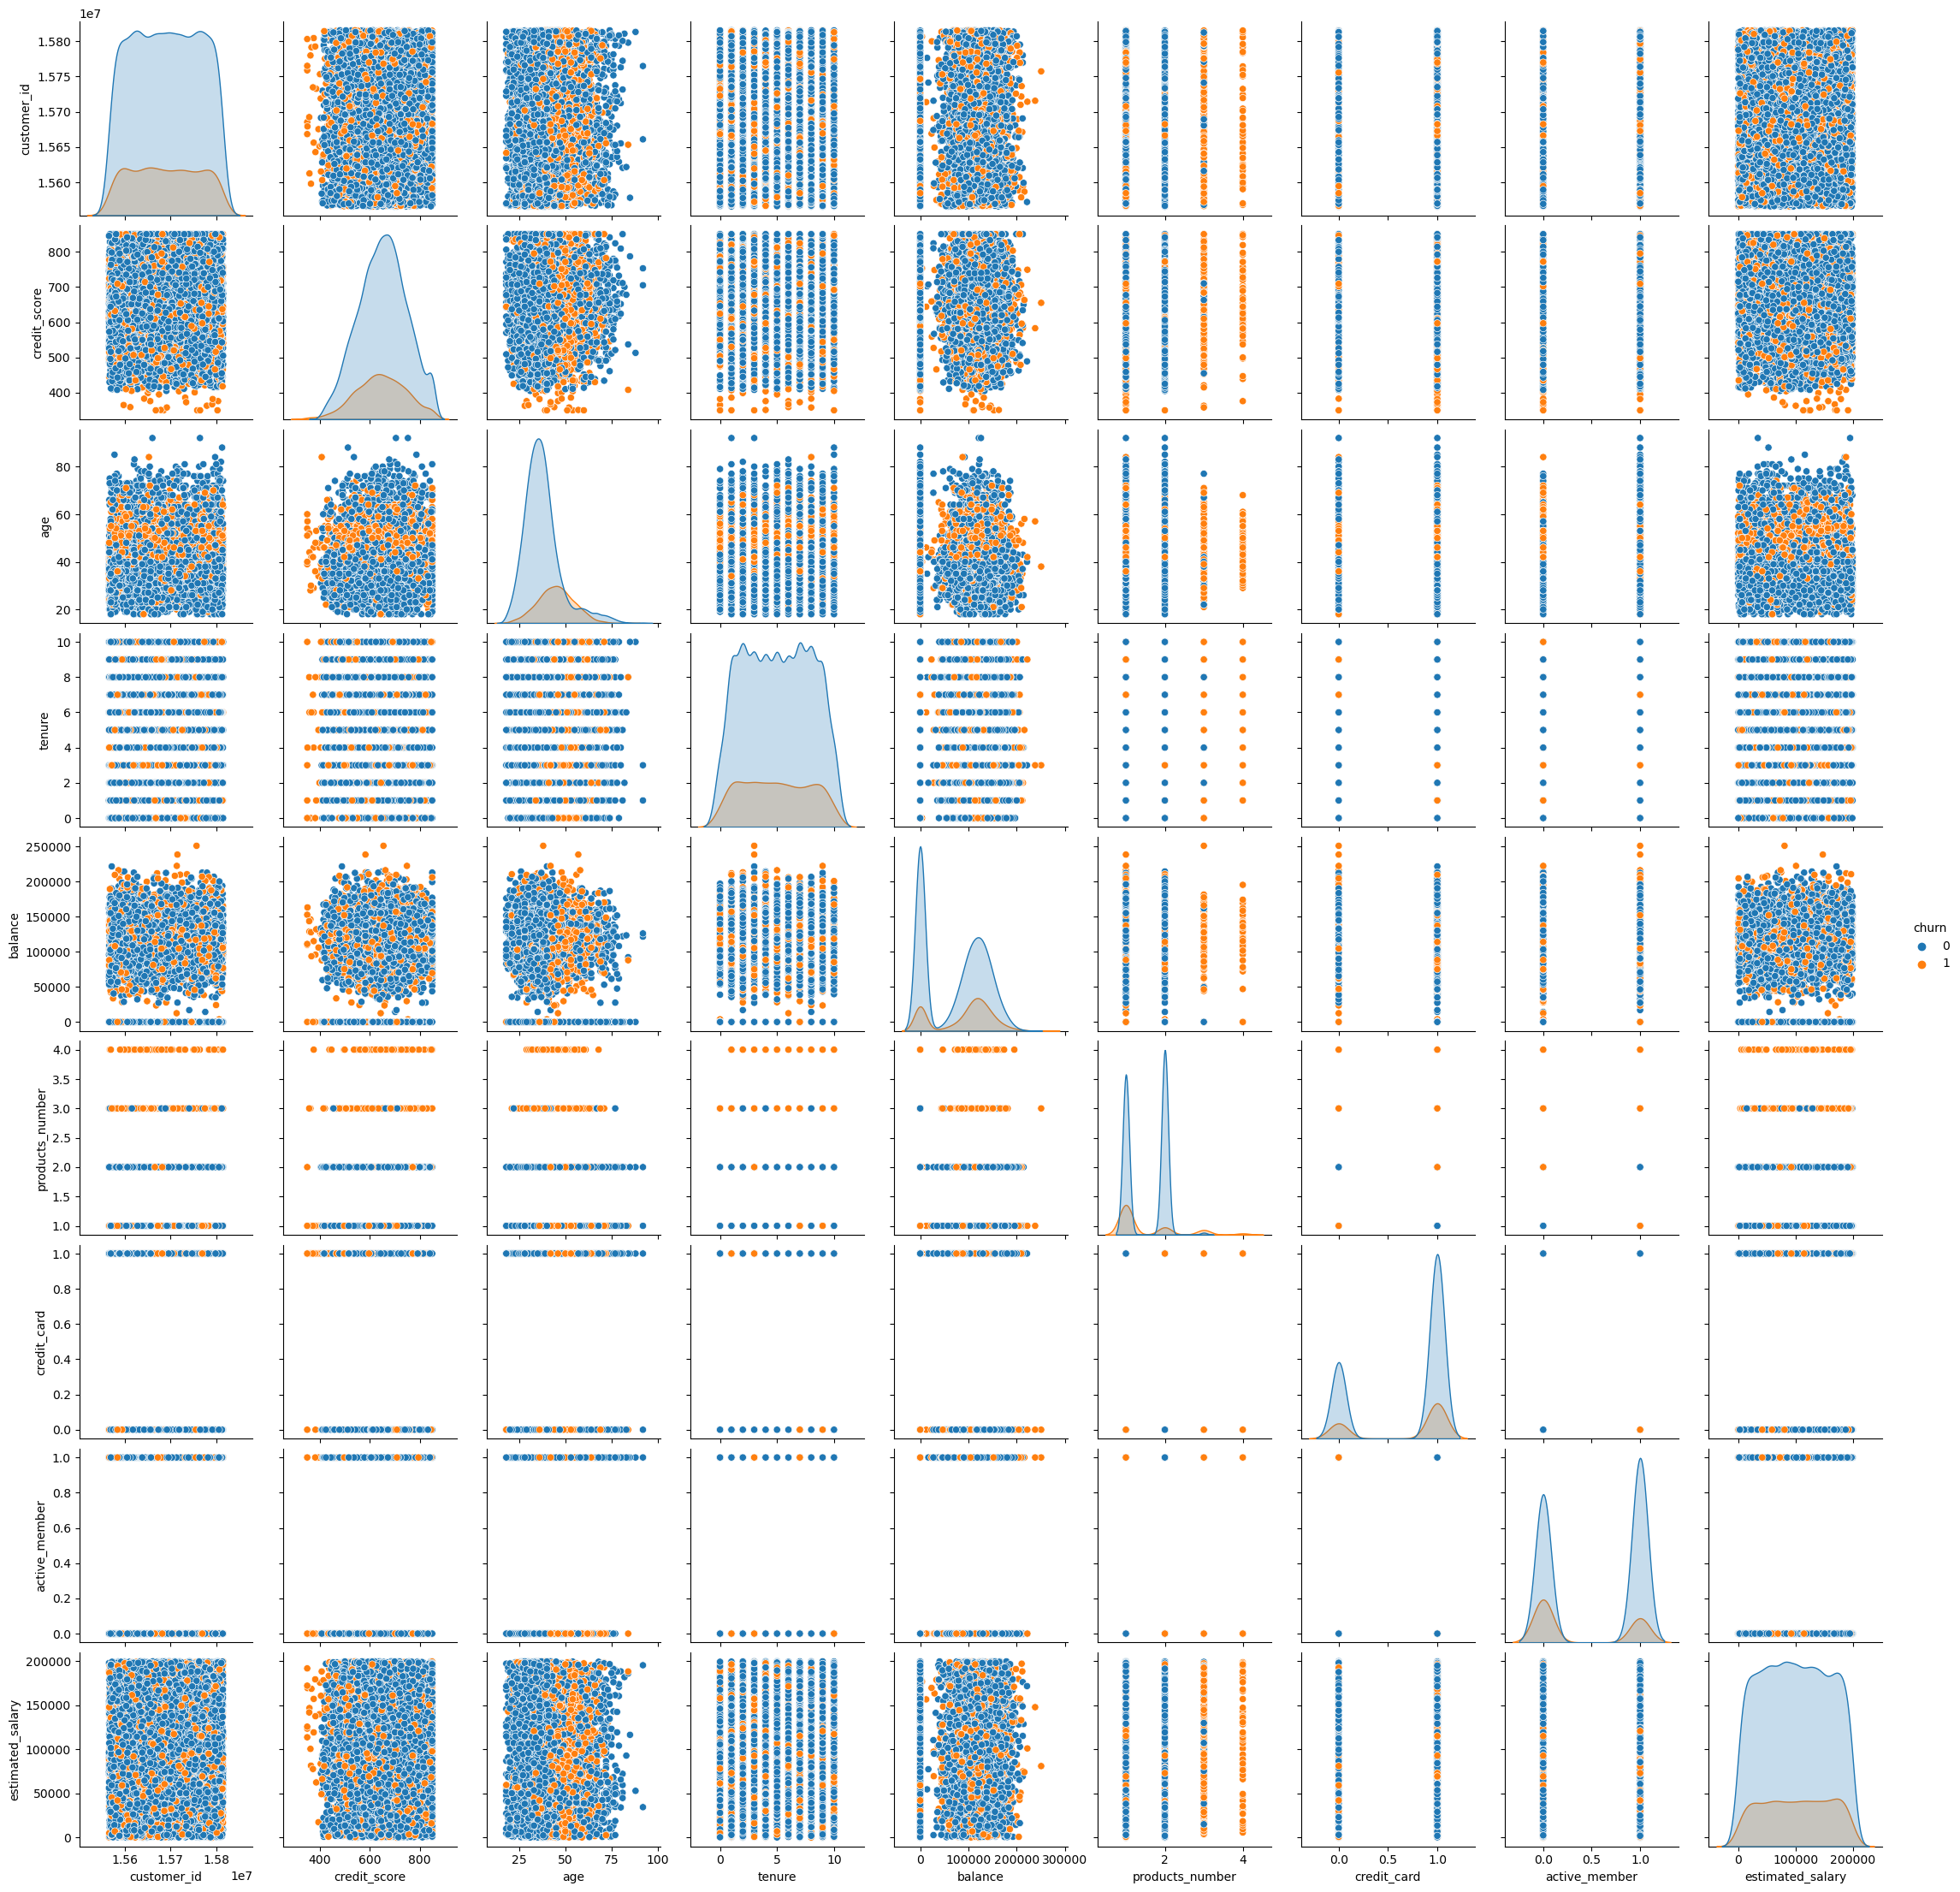

In [8]:
sns.pairplot(df,hue='churn')

<Axes: xlabel='active_member', ylabel='count'>

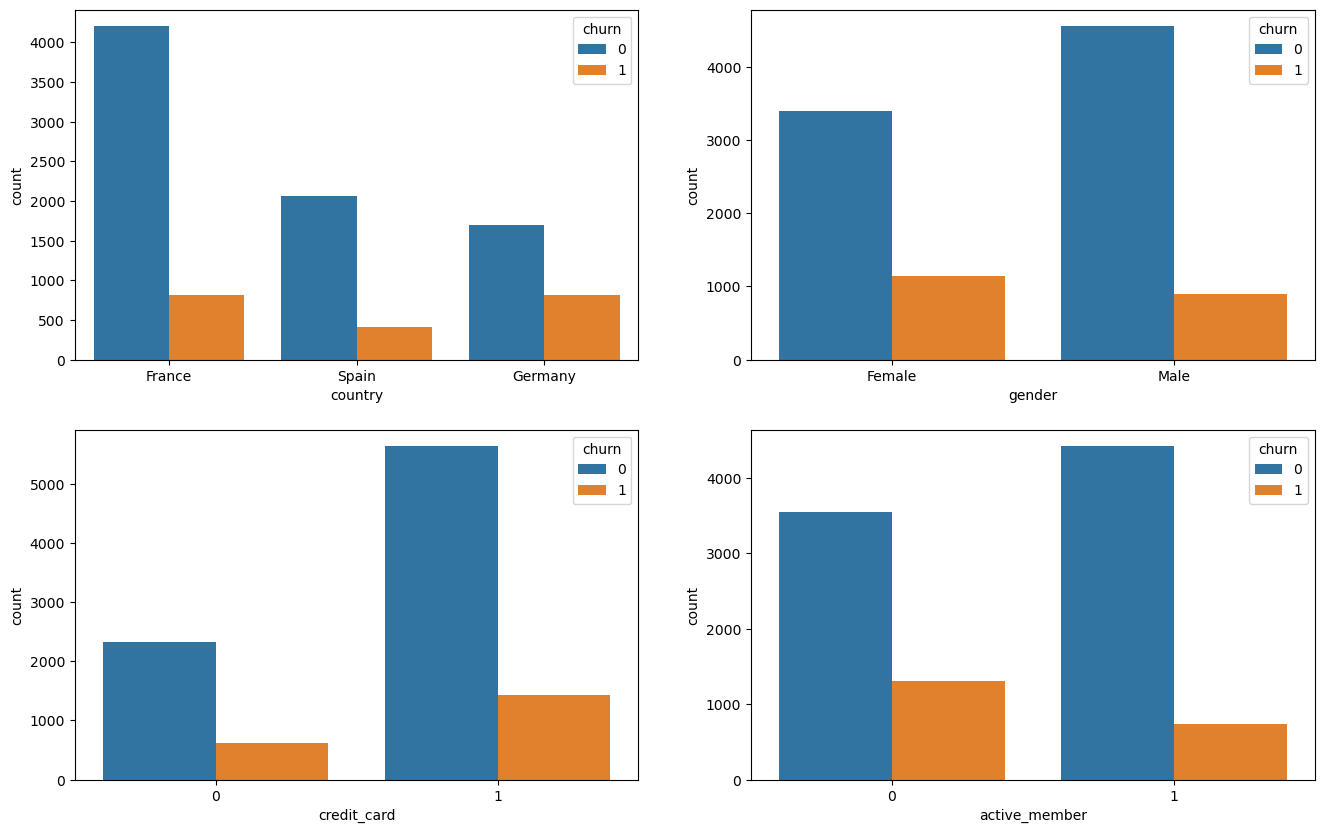

In [9]:
#Analysing Relationship with different variables
plt.figure(figsize=(16,10))
plt.subplot(2,2,1)
sns.countplot(x=df["country"],hue=df["churn"])
plt.subplot(2,2,2)
sns.countplot(x= df["gender"],hue=df["churn"])
plt.subplot(2,2,3)
sns.countplot(x=df["credit_card"],hue=df["churn"])
plt.subplot(2,2,4)
sns.countplot(x=df["active_member"],hue=df["churn"])

In France ,churning rate is more As population is also high so customer service can be a problem in huge no of customers.
Female customers churning is greater than that of males.
credit cards should can be a criteria to retain the customers but not making much impact on churn
Inactive members have a great churn.So some exciting schemes should be launched to make them active again.


<Axes: xlabel='churn', ylabel='tenure'>

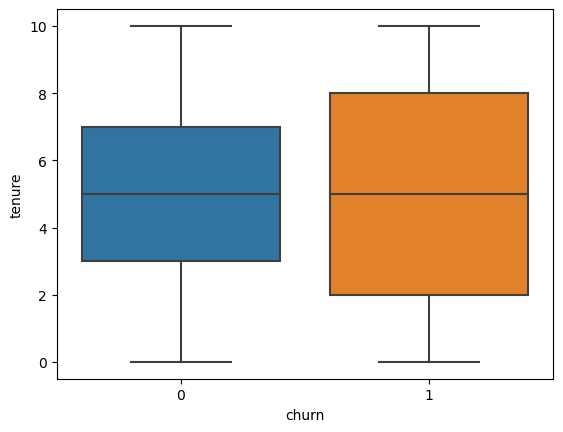

In [10]:
sns.boxplot(x="churn",y="tenure",data=df)

#### Clients on either extreme end (has spent most years and some who recently joined)are more likely to churn as compared to avg tenure customers 

<Axes: xlabel='churn', ylabel='balance'>

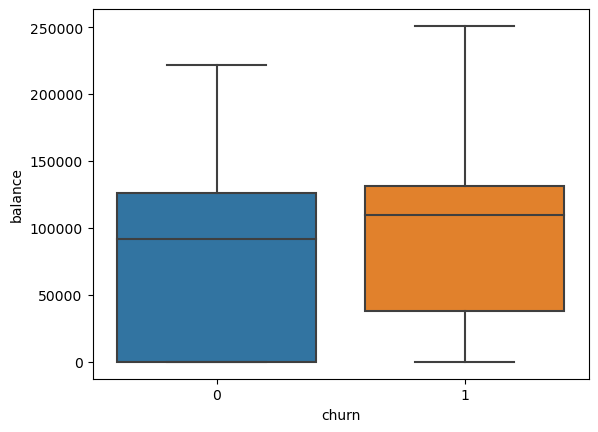

In [11]:
sns.boxplot(x="churn",y="balance",data=df)

#### Bank is loosing customers with significant bank balances

In [12]:
df['age'].value_counts()

37    478
38    477
35    474
36    456
34    447
     ... 
92      2
82      1
88      1
85      1
83      1
Name: age, Length: 70, dtype: int64

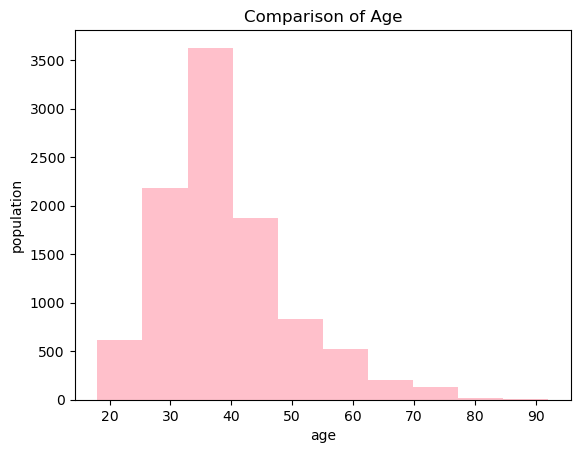

In [13]:
#comparison of age in dataset
plt.hist(x=df.age,bins=10,color="pink")
plt.title("Comparison of Age")
plt.xlabel('age')
plt.ylabel('population')
plt.show()

#### All age groups should be taken care of not only of certain age group

In [14]:
df['active_member'].value_counts()

1    5151
0    4849
Name: active_member, dtype: int64

In [15]:
labels= ["Active","inactive"]
cnt= df['active_member'].value_counts().values
cnt

array([5151, 4849], dtype=int64)

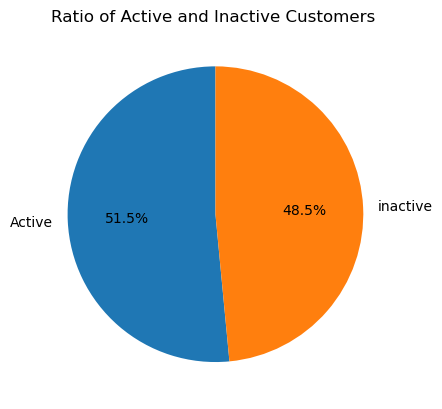

In [16]:
fig1,axs1 = plt.subplots()
axs1.pie(cnt,labels=labels, autopct ='%1.1f%%',startangle =90)
plt.title('Ratio of Active and Inactive Customers ')
plt.show()

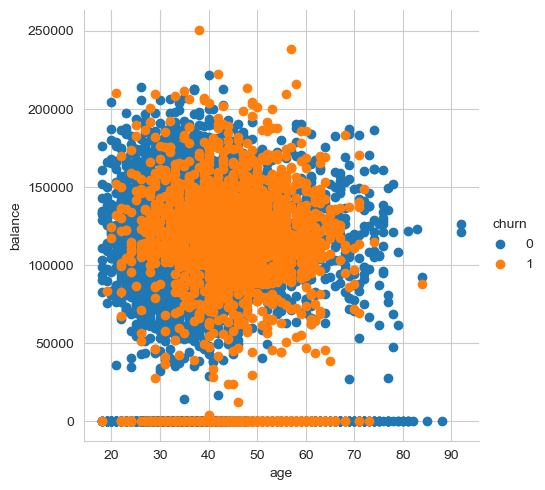

In [17]:
#scatterplot
sns.set_style('whitegrid')
sns. FacetGrid(df,hue='churn',height = 5).map(plt.scatter,
                                                 'age','balance').add_legend()


### customers in age group (20-25)and (70-80)had good amount of balance but due to some reasons they were churned 

C:\Users\Saloni Pahwa\AppData\Local\Temp\ipykernel_369272\3764993958.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmap=df.corr()


<Axes: >

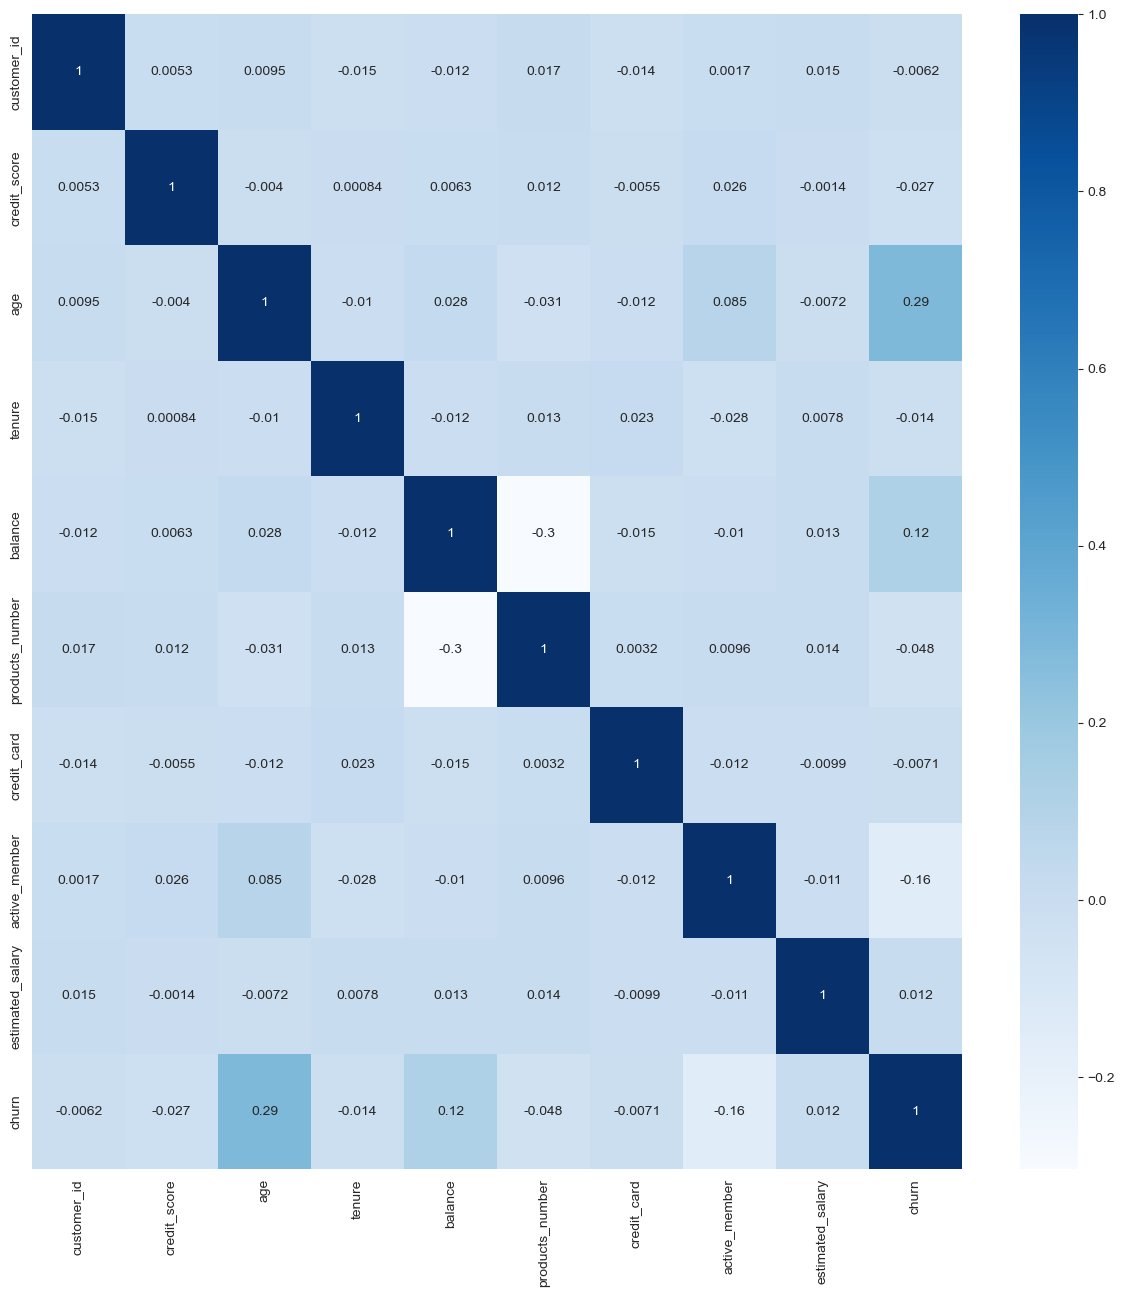

In [18]:
corrmap=df.corr()
top_corr_features=corrmap.index
plt.figure(figsize=(15,15))
sns.heatmap(df[top_corr_features].corr(),annot=True,cmap='Blues')


In [19]:
#Removing unnecassary column
df.drop(['customer_id'],inplace=True,axis=1)

In [20]:
print(df)

      credit_score  country  gender  age  tenure    balance  products_number  \
0              619   France  Female   42       2       0.00                1   
1              608    Spain  Female   41       1   83807.86                1   
2              502   France  Female   42       8  159660.80                3   
3              699   France  Female   39       1       0.00                2   
4              850    Spain  Female   43       2  125510.82                1   
...            ...      ...     ...  ...     ...        ...              ...   
9995           771   France    Male   39       5       0.00                2   
9996           516   France    Male   35      10   57369.61                1   
9997           709   France  Female   36       7       0.00                1   
9998           772  Germany    Male   42       3   75075.31                2   
9999           792   France  Female   28       4  130142.79                1   

      credit_card  active_member  estim

# Encoding

In [21]:
#converting Gender into numeric values
df['gender']=df['gender'].map({"Male":1,'Female':0})

In [22]:
#converting country into numeric values
df['country']=df['country'].map({"France":1,'Germany':0,'Spain':2})

In [23]:
df

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,1,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,1,0,42,8,159660.80,3,1,0,113931.57,1
3,699,1,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,1,39,5,0.00,2,1,0,96270.64,0
9996,516,1,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,1,0,36,7,0.00,1,0,1,42085.58,1
9998,772,0,1,42,3,75075.31,2,1,0,92888.52,1


In [24]:
df

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,1,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,1,0,42,8,159660.80,3,1,0,113931.57,1
3,699,1,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,1,39,5,0.00,2,1,0,96270.64,0
9996,516,1,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,1,0,36,7,0.00,1,0,1,42085.58,1
9998,772,0,1,42,3,75075.31,2,1,0,92888.52,1


# Train Test Split

In [25]:
#creating train and test data
x = df.iloc[:,0:10]  #shifting all input columns in X dataframe
y = df.iloc[:,-1]# shifting output column in y data frame

In [26]:
x.shape

(10000, 10)

In [27]:
#Splitting data into train and test
from sklearn.model_selection import train_test_split

In [28]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [29]:
y_train.shape

(8000,)

#### Standardizing The dataset

In [30]:
#on Independent Variable to convert them into values ranging from-1 to +1 to make fair comparison
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

x_train= pd.DataFrame(x_train)
x_train.head()

,0,1,2,3,4,5,6,7,8,9
0,0.503624,0.002300,-1.092788,0.399166,-0.700246,0.059159,-0.912738,0.645703,-1.027375,1.726206
1,0.596510,1.417402,0.915091,0.687867,0.681591,-0.131944,-0.912738,0.645703,0.973355,-1.051752
2,-0.332352,0.002300,-1.092788,0.687867,0.336132,1.168459,-0.912738,0.645703,-1.027375,0.356836
3,0.710038,0.002300,-1.092788,1.457738,0.681591,-1.230863,0.813889,0.645703,0.973355,0.432917
4,-0.518124,0.002300,0.915091,-0.948108,1.027050,-1.230863,0.813889,-1.548700,0.973355,-1.137987


# Modelling

### Decision Tree Classifier

In [31]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()

In [32]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [33]:
y_pred = model.predict(x_test)

In [34]:
from sklearn.metrics import accuracy_score

In [35]:
acc = accuracy_score(y_test, y_pred)

In [36]:
acc

0.7835

In [37]:
from sklearn.metrics import confusion_matrix

In [38]:
mat = confusion_matrix(y_test,y_pred)

In [39]:
mat

array([[1354,  252],
       [ 181,  213]], dtype=int64)

<Axes: >

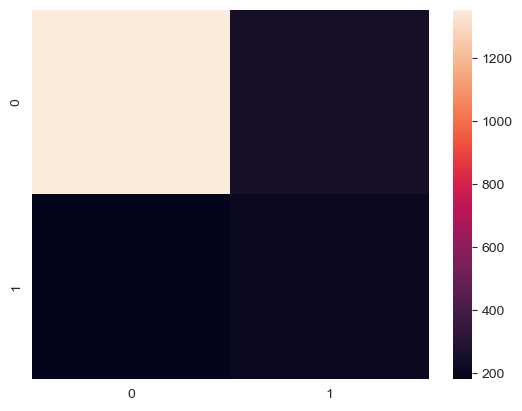

In [40]:
sns.heatmap(mat)

### SVM Classifier

In [41]:
from sklearn.svm import SVC

In [42]:
model = SVC()
model.fit(x_train, y_train)

SVC()

In [43]:
t_pred = model.predict(x_test)

In [44]:
accur = accuracy_score(y_test, y_pred)
accur

0.7835

In [45]:
matrix = confusion_matrix(y_test,y_pred)

In [46]:
matrix

array([[1354,  252],
       [ 181,  213]], dtype=int64)

# KNN 

In [47]:
from sklearn.neighbors import KNeighborsClassifier

In [48]:
model = KNeighborsClassifier()

In [49]:
model.fit(x_train, y_train)

KNeighborsClassifier()

In [50]:
y_pred = model.predict(x_test)

In [51]:
acc = accuracy_score(y_test, y_pred)
acc

0.8415

In [52]:
con = confusion_matrix(y_test, y_pred)
con

array([[1519,   87],
       [ 230,  164]], dtype=int64)

<Axes: >

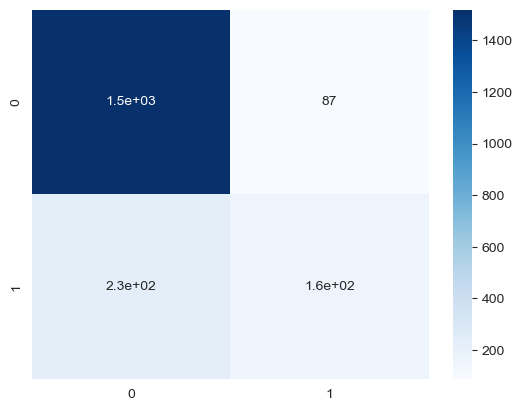

In [53]:
sns.heatmap(con,annot = True, cmap='Blues')

# Naive Bayes classifier

In [54]:
from sklearn.naive_bayes import GaussianNB

In [55]:
model = GaussianNB()
model.fit(x_train, y_train)

GaussianNB()

In [56]:
y_pred = model.predict(x_test)

In [57]:
acc = accuracy_score(y_test,y_pred)

In [58]:
acc

0.838

In [59]:
conf = confusion_matrix(y_test, y_pred)
conf

array([[1560,   46],
       [ 278,  116]], dtype=int64)

<Axes: >

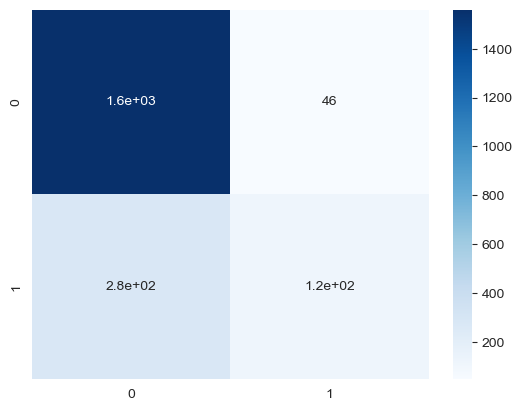

In [60]:
sns.heatmap(conf,annot = True, cmap='Blues')

In [61]:
from sklearn.linear_model import LogisticRegression

In [62]:
model=LogisticRegression()

In [63]:
model.fit(x_train,y_train)

LogisticRegression()

In [64]:
y_pred =model.predict(x_test)

In [65]:
accuracy_score(y_test,y_pred)

0.814

In [66]:
from sklearn.metrics import confusion_matrix
con_matrix = confusion_matrix(y_test,y_pred)

In [67]:
con_matrix 

array([[1558,   48],
       [ 324,   70]], dtype=int64)

<Axes: >

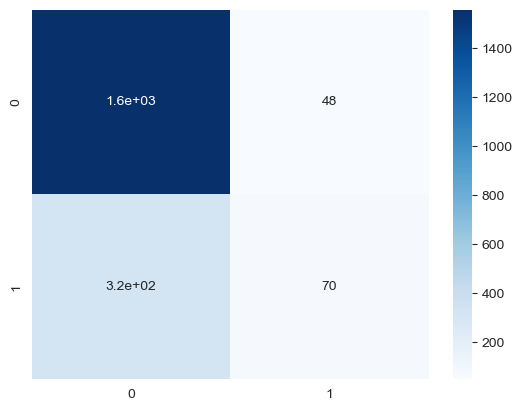

In [68]:
sns.heatmap(con_matrix,annot = True,cmap="Blues")

# Summary

### Among all the models used KNN-Nearest neighbor Classification gave the most accurate results with approx 84% of accuracy result.